In [62]:
import pandas as pd  # Importa la biblioteca pandas para manipulación de datos
from sklearn.model_selection import train_test_split  # Importa la función train_test_split para dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.metrics import accuracy_score  # Importa la función accuracy_score para calcular la precisión del modelo
from sklearn.tree import DecisionTreeClassifier  # Importa la clase DecisionTreeClassifier para el algoritmo de árbol de decisiones
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score  # Importa varias funciones de evaluación de modelos
from sklearn import metrics  # Importa la biblioteca metrics para métricas de evaluación de modelos
from sklearn.tree import plot_tree  # Importa la función plot_tree para trazar el árbol de decisiones
import seaborn as sns  # Importa la biblioteca seaborn para gráficos estadístico
import numpy as np  # Importa la biblioteca NumPy
import matplotlib.pyplot as plt  # Importa la biblioteca matplotlib.pyplot para gráficos y visualizaciones

In [71]:
data =pd.read_csv('breast-cancer.csv') 
counts = data.groupby('diagnosis').size()# Cuenta la cantidad de muestras en cada clase
min_count = min(counts)# Obtiene la cantidad mínima de muestras entre las clases
subsampled_data = data.groupby('diagnosis').apply(lambda x: x.sample(n=min_count, random_state=42)) # Realiza submuestreo en cada clase para igualar la cantidad de muestras
subsampled_data = subsampled_data.reset_index(drop=True) # Restablece el índice del DataFrame resultante
# El DataFrame 'subsampled_data' contiene la cantidad igualada de datos


In [72]:
subsampled_data = data.drop(['id'], axis=1)  
subsampled_data['diagnosis'] = data['diagnosis'].map({ 'M': 1, 'B': 0 })
X = subsampled_data.drop('diagnosis', axis=1) 
y = subsampled_data['diagnosis']

In [73]:
data.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

In [74]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [75]:
# Dividir los datos en conjuntos de entrenamiento y prueba
# utilizando la función train_test_split de scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Random Forest**

In [76]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Crea una instancia de RandomForestClassifier
rf.fit(X_train, y_train)  # Ajusta el modelo de bosque aleatorio utilizando los datos de entrenamiento
y_predRFC = rf.predict(X_test)  # Realiza predicciones utilizando el modelo de bosque aleatorio en el conjunto de prueba

In [77]:
# Obtener la matriz de confusión
confusion_mat = confusion_matrix(y_test, y_predRFC)
print("Matriz de confusión:")
print(confusion_mat)

# Obtener el informe de clasificación
classification = classification_report(y_test, y_predRFC)
print("Informe de clasificación:")
print(classification)

# Obtener la accuary general
accuracy = accuracy_score(y_test, y_predRFC)
print("Accuracy del modelo:", accuracy)

# Obtener la precision general
precision = precision_score(y_test, y_predRFC)
print("presición del modelo:", precision)

#Obtener el f1 general
f1 = f1_score(y_test, y_predRFC)
print("Puntuación F1:", f1)

Matriz de confusión:
[[72  0]
 [ 3 39]]
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy del modelo: 0.9736842105263158
presición del modelo: 1.0
Puntuación F1: 0.962962962962963


In [78]:
from sklearn.model_selection import cross_val_score
# Realizar la validación cruzada con 5 pliegues
cv_scoresrf = cross_val_score(rf, X, y, cv=5)

# Imprimir los puntajes de validación cruzada obtenidos en cada pliegue
print("Cross-validation scores: ", cv_scoresrf)

# Calcular y mostrar el promedio de los puntajes de validación cruzada
print("Average cross-validation score: ", cv_scoresrf.mean())

Cross-validation scores:  [0.92105263 0.93859649 0.98245614 0.96491228 0.97345133]
Average cross-validation score:  0.9560937742586555


Average cross-validation score:  95%

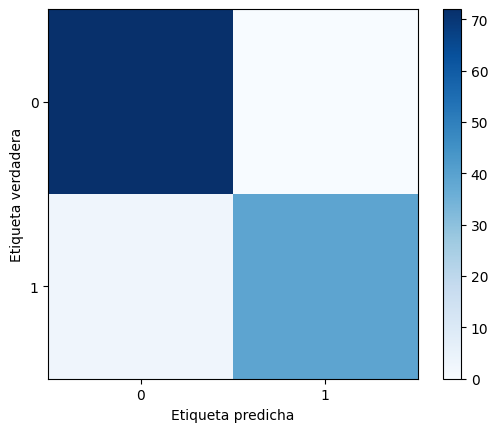

In [79]:
labels = np.unique(y_test)
confusion_mat = confusion_matrix(y_test, y_predRFC, labels=labels)

fig, ax = plt.subplots()
im = ax.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(confusion_mat.shape[1]),
       yticks=np.arange(confusion_mat.shape[0]),
       xticklabels=labels, yticklabels=labels,
       xlabel='Etiqueta predicha', ylabel='Etiqueta verdadera')

plt.show()

In [80]:
import pickle

In [81]:
filename='model.sav'

In [82]:
pickle.dump(rf, open(filename, 'wb'))